# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
# We will be checking for value of K from 0 to 25 so
n = 25
accuracy = np.zeros(n)
for i in range(1,n+1):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    accuracy[i-1] = (accuracy_score(y_test, y_test_predicted))
accuracy

array([ 0.65467626,  0.72661871,  0.67625899,  0.72661871,  0.69064748,
        0.69064748,  0.64748201,  0.69064748,  0.63309353,  0.69784173,
        0.69064748,  0.69784173,  0.69064748,  0.69784173,  0.6618705 ,
        0.69064748,  0.6618705 ,  0.67625899,  0.67625899,  0.67625899,
        0.70503597,  0.71223022,  0.72661871,  0.74100719,  0.74100719])

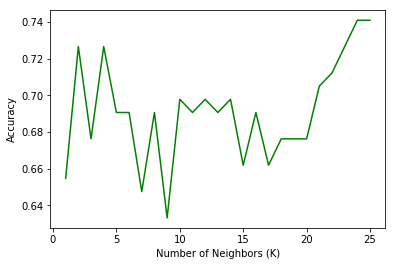

Maximum Accuracy Got is - 


,0
24,0.741007


In [26]:
plt.plot(range(1,n+1),accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

accuracy = pd.DataFrame(accuracy)
print("Maximum Accuracy Got is - " )
accuracy.sort_values(by = 0, ascending = False)[0:1]

In [27]:
clf_KNN = KNeighborsClassifier(n_neighbors = 24).fit(X_train, y_train)
# y_test_pred_KNN = clf_KNN.predict(X_test)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf2 = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)
y_test_pred_KNN = clf.predict(X_test)
print("Accuracy using criterion as gini - ", accuracy_score(y_test, y_test_pred_KNN))
clf3 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_test_pred_KNN = clf2.predict(X_test)
print("Accuracy using criterion as entropy - ", accuracy_score(y_test, y_test_pred_KNN))

Accuracy using criterion as gini -  0.741007194245
Accuracy using criterion as entropy -  0.654676258993


In [30]:
# using criterion as gini
clf_DT = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)

# Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
clf4 = SVC(kernel = 'poly').fit(X_train, y_train)
print("accuracy using polynomial kernel - ", accuracy_score(y_test, clf2.predict(X_test)))
clf5 = SVC(kernel = 'rbf').fit(X_train, y_train)
print("accuracy using Radial Basis function kernel - ", accuracy_score(y_test, clf3.predict(X_test)))

accuracy using polynomial kernel -  0.654676258993
accuracy using Radial Basis function kernel -  0.640287769784


In [33]:
# using linear for kernel in our SVM model
clf_SVM = SVC(kernel = 'poly', random_state = 4).fit(X_train, y_train)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf_LR = LogisticRegression(solver='lbfgs', warm_start = True)
clf_LR.fit(X_train, y_train)
#print("accuracy score - ", accuracy_score(y_test, clf_LR.predict(X_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=True)

# Model Evaluation using Test set

In [36]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [37]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-26 01:25:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-26 01:25:52 (585 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [38]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Test Data Pre-processing:  Feature selection/extraction same as done with train data

In [39]:
# conversion to datetime object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [40]:
# creating weekend column
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [41]:
# replacing male and female string with 0 and 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [42]:
# creaing dummies and dropping one column

X_t = test_df[['Principal','terms','age','Gender','weekend']]
X_t = pd.concat([X_t,pd.get_dummies(test_df['education'])], axis=1)
X_t.drop(['Master or Above'], axis = 1,inplace=True)
X_t.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [43]:
# Feature Scaling
X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)
X_t[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [44]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [45]:
y_t = test_df['loan_status'].values
y_t[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# np arrays to store intermediate result
Jaccard = np.full(4, np.nan)
F1_score = np.full(4, np.nan)
LogLoss = np.full(4, np.nan)
Algorithm = np.array(4)
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

In [47]:
Jaccard[0] = jaccard_similarity_score(y_t, clf_KNN.predict(X_t))
Jaccard[1] = jaccard_similarity_score(y_t, clf_DT.predict(X_t))
Jaccard[2] = jaccard_similarity_score(y_t, clf_SVM.predict(X_t))
Jaccard[3] = jaccard_similarity_score(y_t, clf_LR.predict(X_t))

In [48]:
F1_score[0] = f1_score(y_t, clf_KNN.predict(X_t))
F1_score[1] = f1_score(y_t, clf_DT.predict(X_t))
F1_score[2] = f1_score(y_t, clf_SVM.predict(X_t))
F1_score[3] = f1_score(y_t, clf_LR.predict(X_t))

In [49]:
LogLoss[3] = log_loss(y_t, clf_LR.predict_proba(X_t))

In [50]:
Report = pd.DataFrame({"Jaccard":Jaccard, "F1-score":F1_score, "LogLoss":LogLoss}, index=Algorithm)

#  Report

In [51]:
Report

,F1-score,Jaccard,LogLoss
KNN,0.235294,0.759259,NaN
Decision Tree,0.300000,0.740741,NaN
SVM,0.352941,0.796296,NaN
LogisticRegression,0.250000,0.777778,0.470967


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>